## Libraries used for the project

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
from scipy.stats import linregress

from config import weather_api_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)

lng_range = (-180, 180)

## code to get a list of cities

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

626

## Use of API to get data for each city

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
resp_json = []

In [4]:
for x in range(len(cities)):
    print(f"Processing Record {x} of Set 1 - {cities[x]}")
    
    post_record = requests.get(url + "q=" + cities[x] + "&appid=" + weather_api_key)
    
    resp_json.append(post_record.json())

Processing Record 0 of Set 1 - kamenka
Processing Record 1 of Set 1 - luderitz
Processing Record 2 of Set 1 - rikitea
Processing Record 3 of Set 1 - srandakan
Processing Record 4 of Set 1 - tutoia
Processing Record 5 of Set 1 - dukat
Processing Record 6 of Set 1 - san patricio
Processing Record 7 of Set 1 - barrow
Processing Record 8 of Set 1 - rundu
Processing Record 9 of Set 1 - new norfolk
Processing Record 10 of Set 1 - east london
Processing Record 11 of Set 1 - atuona
Processing Record 12 of Set 1 - waipawa
Processing Record 13 of Set 1 - olafsvik
Processing Record 14 of Set 1 - illoqqortoormiut
Processing Record 15 of Set 1 - belushya guba
Processing Record 16 of Set 1 - albany
Processing Record 17 of Set 1 - pangnirtung
Processing Record 18 of Set 1 - tecoanapa
Processing Record 19 of Set 1 - esperance
Processing Record 20 of Set 1 - port alfred
Processing Record 21 of Set 1 - yellowknife
Processing Record 22 of Set 1 - palu
Processing Record 23 of Set 1 - kapaa
Processing Reco

Processing Record 199 of Set 1 - dikson
Processing Record 200 of Set 1 - salta
Processing Record 201 of Set 1 - souillac
Processing Record 202 of Set 1 - goure
Processing Record 203 of Set 1 - hami
Processing Record 204 of Set 1 - navabad
Processing Record 205 of Set 1 - ola
Processing Record 206 of Set 1 - margate
Processing Record 207 of Set 1 - avarua
Processing Record 208 of Set 1 - jumla
Processing Record 209 of Set 1 - padang
Processing Record 210 of Set 1 - el faiyum
Processing Record 211 of Set 1 - grindavik
Processing Record 212 of Set 1 - westport
Processing Record 213 of Set 1 - port elizabeth
Processing Record 214 of Set 1 - bhatkal
Processing Record 215 of Set 1 - longyearbyen
Processing Record 216 of Set 1 - ornskoldsvik
Processing Record 217 of Set 1 - kaitangata
Processing Record 218 of Set 1 - dunedin
Processing Record 219 of Set 1 - fuling
Processing Record 220 of Set 1 - mahebourg
Processing Record 221 of Set 1 - livramento
Processing Record 222 of Set 1 - victor har

Processing Record 394 of Set 1 - golden
Processing Record 395 of Set 1 - adrar
Processing Record 396 of Set 1 - salym
Processing Record 397 of Set 1 - samarai
Processing Record 398 of Set 1 - petrolina
Processing Record 399 of Set 1 - bababe
Processing Record 400 of Set 1 - conceicao do araguaia
Processing Record 401 of Set 1 - isabela
Processing Record 402 of Set 1 - mumbwa
Processing Record 403 of Set 1 - vallenar
Processing Record 404 of Set 1 - mar del plata
Processing Record 405 of Set 1 - salalah
Processing Record 406 of Set 1 - sabang
Processing Record 407 of Set 1 - narsaq
Processing Record 408 of Set 1 - mlonggo
Processing Record 409 of Set 1 - mujiayingzi
Processing Record 410 of Set 1 - mercedes
Processing Record 411 of Set 1 - ous
Processing Record 412 of Set 1 - tautira
Processing Record 413 of Set 1 - acari
Processing Record 414 of Set 1 - pochutla
Processing Record 415 of Set 1 - antalaha
Processing Record 416 of Set 1 - gavrilov posad
Processing Record 417 of Set 1 - me

Processing Record 589 of Set 1 - akyab
Processing Record 590 of Set 1 - meyungs
Processing Record 591 of Set 1 - necochea
Processing Record 592 of Set 1 - cruzeiro do sul
Processing Record 593 of Set 1 - mayo
Processing Record 594 of Set 1 - loudi
Processing Record 595 of Set 1 - tigil
Processing Record 596 of Set 1 - manokwari
Processing Record 597 of Set 1 - russellville
Processing Record 598 of Set 1 - satitoa
Processing Record 599 of Set 1 - norrtalje
Processing Record 600 of Set 1 - esil
Processing Record 601 of Set 1 - buique
Processing Record 602 of Set 1 - henzada
Processing Record 603 of Set 1 - anchorage
Processing Record 604 of Set 1 - ochakiv
Processing Record 605 of Set 1 - grand river south east
Processing Record 606 of Set 1 - weligama
Processing Record 607 of Set 1 - mandan
Processing Record 608 of Set 1 - port macquarie
Processing Record 609 of Set 1 - college
Processing Record 610 of Set 1 - high level
Processing Record 611 of Set 1 - camacha
Processing Record 612 of 

In [5]:
city = []
lat = []
lng = []
max_tmp = []
humi = []
cloud = []
wind_sp = []
country = []
date = []

url_2 = "http://api.openweathermap.org/data/2.5/weather?"
url_qry = f"{url_2}appid={weather_api_key}&q="

for citi in cities:
    citydata = requests.get(url_qry + citi).json()
    
    if citydata['cod'] != '404':
        city.append(citydata['name'])
        lat.append(citydata['coord']['lat'])
        lng.append(citydata['coord']['lon'])
        max_tmp.append(citydata['main']['temp_max'])
        humi.append(citydata['main']['humidity'])
        cloud.append(citydata['clouds']['all'])
        wind_sp.append(citydata['wind']['speed'])
        country.append(citydata['sys']['country'])
        date.append(citydata['dt'])



## Transform data to csv file and DataFrame 

In [6]:
city_dict = {
    "City": city,
    "Lat" : lat,
    "Lon" : lng,
    "Temp Max" : max_tmp,
    "Humidity" : humi,
    "Cloudiness" : cloud,
    "Wind Speed" : wind_sp,
    "Country" : country,
    "Date" : date
}
city_weath_df = pd.DataFrame(city_dict)

In [7]:
city_weath_df.to_csv('city_weather.csv', index=False)

In [8]:
city_weath_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,265.93,78,100,6.81,RU,1613202119
1,Lüderitz,-26.6481,15.1594,291.96,83,99,3.46,NA,1613201782
2,Rikitea,-23.1203,-134.9692,299.40,77,40,4.87,PF,1613201753
3,Srandakan,-7.9386,110.2506,301.68,74,100,4.41,ID,1613202120
4,Tutóia,-2.7619,-42.2744,298.50,89,96,3.65,BR,1613202120


In [9]:
city_weath_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,265.93,78,100,6.81,RU,1613202119
1,Lüderitz,-26.6481,15.1594,291.96,83,99,3.46,NA,1613201782
2,Rikitea,-23.1203,-134.9692,299.40,77,40,4.87,PF,1613201753
3,Srandakan,-7.9386,110.2506,301.68,74,100,4.41,ID,1613202120
4,Tutóia,-2.7619,-42.2744,298.50,89,96,3.65,BR,1613202120
...,...,...,...,...,...,...,...,...,...
568,Meadow Lake,34.8014,-106.5436,276.15,65,20,3.60,US,1613201835
569,Zemio,5.0314,25.1361,306.79,16,78,2.28,CF,1613201762
570,Barra do Bugres,-15.0725,-57.1811,294.52,97,100,1.22,BR,1613202219
571,General Roca,-39.0333,-67.5833,294.15,64,0,3.59,AR,1613202219


## DataFrame to show the stats of the records

In [10]:
stat_city = city_weath_df.agg({'Lat':['count','mean','std','min','max'],
                               'Lon':['count','mean','std','min','max'],
                               'Temp Max':['count','mean','std','min','max'],
                               'Humidity':['count','mean','std','min','max'],
                               'Cloudiness':['count','mean','std','min','max'],
                               'Wind Speed':['count','mean','std','min','max'],
                               'Date':['count','mean','std','min','max']})
stat_city

,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.544584,12.564139,282.678028,73.275742,54.176265,3.560698,1.613202e+09
std,33.094879,91.552227,18.774640,20.136268,41.720247,2.699815,1.879134e+02
min,-54.800000,-179.166700,233.150000,7.000000,0.000000,0.070000,1.613201e+09
max,78.218600,178.416700,309.150000,100.000000,100.000000,16.980000,1.613202e+09


## Dropping cities with humidity above 100

In [11]:
out_index = city_weath_df.index[city_weath_df['Humidity'] > 100].tolist()
out_index

[]

In [12]:
new_city_df = city_weath_df.drop(out_index, inplace=False)
new_city_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,265.93,78,100,6.81,RU,1613202119
1,Lüderitz,-26.6481,15.1594,291.96,83,99,3.46,NA,1613201782
2,Rikitea,-23.1203,-134.9692,299.40,77,40,4.87,PF,1613201753
3,Srandakan,-7.9386,110.2506,301.68,74,100,4.41,ID,1613202120
4,Tutóia,-2.7619,-42.2744,298.50,89,96,3.65,BR,1613202120
...,...,...,...,...,...,...,...,...,...
568,Meadow Lake,34.8014,-106.5436,276.15,65,20,3.60,US,1613201835
569,Zemio,5.0314,25.1361,306.79,16,78,2.28,CF,1613201762
570,Barra do Bugres,-15.0725,-57.1811,294.52,97,100,1.22,BR,1613202219
571,General Roca,-39.0333,-67.5833,294.15,64,0,3.59,AR,1613202219


## Stats for new DataFrame

In [13]:
stat_city = new_city_df.agg({'Lat':['count','mean','std','min','max'],
                               'Lon':['count','mean','std','min','max'],
                               'Temp Max':['count','mean','std','min','max'],
                               'Humidity':['count','mean','std','min','max'],
                               'Cloudiness':['count','mean','std','min','max'],
                               'Wind Speed':['count','mean','std','min','max'],
                               'Date':['count','mean','std','min','max']})
stat_city

,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,20.544584,12.564139,282.678028,73.275742,54.176265,3.560698,1.613202e+09
std,33.094879,91.552227,18.774640,20.136268,41.720247,2.699815,1.879134e+02
min,-54.800000,-179.166700,233.150000,7.000000,0.000000,0.070000,1.613201e+09
max,78.218600,178.416700,309.150000,100.000000,100.000000,16.980000,1.613202e+09


In [14]:
new_city_df.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,265.93,78,100,6.81,RU,1613202119
1,Lüderitz,-26.6481,15.1594,291.96,83,99,3.46,NA,1613201782
2,Rikitea,-23.1203,-134.9692,299.40,77,40,4.87,PF,1613201753
3,Srandakan,-7.9386,110.2506,301.68,74,100,4.41,ID,1613202120
4,Tutóia,-2.7619,-42.2744,298.50,89,96,3.65,BR,1613202120


# Plotting the Data

## Latitude vs. Temperature Plot

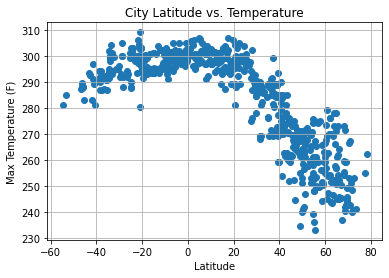

In [15]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,3])
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

##### You can observe that the increase of the latitude is related with the decrease in the Max Temperature

## Latitude vs. Huimidity Plot

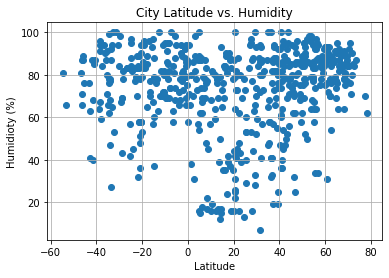

In [16]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,4])
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidioty (%)')
plt.grid(True)
plt.show()

##### The Latitudes between 0 and 40 have the lower humidity percentage

## Latitude vs. Cloudiness Plot

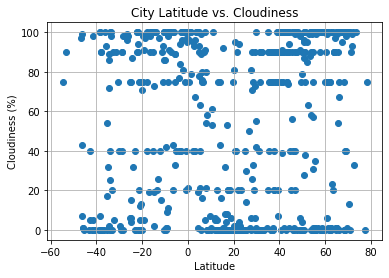

In [17]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,5])
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

##### There is no visible behavior that shows a relation between the latitude and the cloudiness

## Latitude vs. Wind Speed Plot

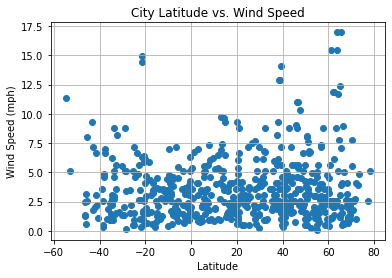

In [18]:
plt.scatter(new_city_df.iloc[:,1], new_city_df.iloc[:,6])
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

##### Most of the cities, specially in the latitudes between -20 and 20 have wind speed lower than 10 mph

# Linear Regression

### Northern Hemisphere DataFrame

In [19]:
nh_city_df = new_city_df[new_city_df.Lat >= 0]
nh_city_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamenka,51.3223,42.7678,265.93,78,100,6.81,RU,1613202119
5,Dukat,62.5500,155.5500,243.75,84,1,2.06,RU,1613202120
6,San Patricio,28.0170,-97.5169,276.15,87,90,3.60,US,1613201758
7,Barrow,71.2906,-156.7887,251.15,71,90,2.57,US,1613201776
13,Olafsvik,64.8945,-23.7142,278.01,74,100,12.42,IS,1613202121
...,...,...,...,...,...,...,...,...,...
565,Kotka,60.4664,26.9458,267.59,93,90,2.57,FI,1613202218
566,Noyabrsk,63.1994,75.4507,246.65,87,100,2.25,RU,1613202218
568,Meadow Lake,34.8014,-106.5436,276.15,65,20,3.60,US,1613201835
569,Zemio,5.0314,25.1361,306.79,16,78,2.28,CF,1613201762


### Southern Hemisphere DataFrame

In [20]:
sh_city_df = new_city_df[new_city_df.Lat < 0]
sh_city_df

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
1,Lüderitz,-26.6481,15.1594,291.96,83,99,3.46,NA,1613201782
2,Rikitea,-23.1203,-134.9692,299.40,77,40,4.87,PF,1613201753
3,Srandakan,-7.9386,110.2506,301.68,74,100,4.41,ID,1613202120
4,Tutóia,-2.7619,-42.2744,298.50,89,96,3.65,BR,1613202120
8,Rundu,-17.9333,19.7667,293.19,85,100,4.36,NA,1613202120
...,...,...,...,...,...,...,...,...,...
562,Byron Bay,-28.6500,153.6167,300.15,69,90,5.14,AU,1613201794
563,Natal,-5.7950,-35.2094,298.15,88,75,2.57,BR,1613202217
567,Sechura,-5.5569,-80.8222,298.06,68,89,4.47,PE,1613202218
570,Barra do Bugres,-15.0725,-57.1811,294.52,97,100,1.22,BR,1613202219


### Northern Hemisphere Linear Regression

#### Max Temp vs. Latitude

The r-value is: 0.7716588785129468


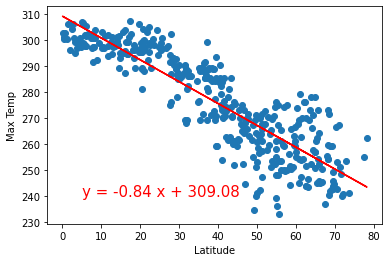

In [21]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(5,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue **2}")
plt.show()

#### Humidity (%) vs. Latitude

The r-value is: 0.12729250820151736


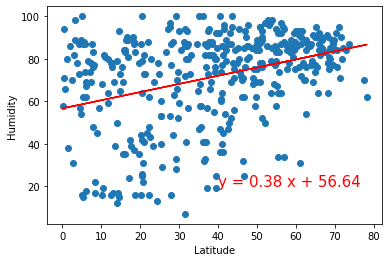

In [22]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue **2}")
plt.show()

#### Cloudiness (%) vs. Latitude

The r-value is: 0.05454163875642036


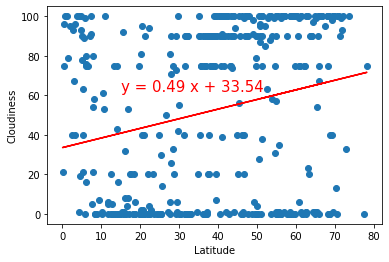

In [23]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(15,62),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue **2}")
plt.show()

#### Wind Speed (mph) vs. Latitude

The r-value is: 0.0015273669952700672


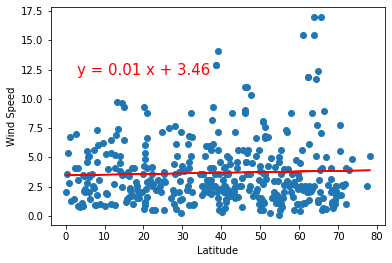

In [24]:
x_val = nh_city_df['Lat']
y_val = nh_city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(3,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue **2}")
plt.show()

### Southern Hemisphere Linear Regression

#### Max Temp vs. Latitude

The r-value is: 0.33006506009967035


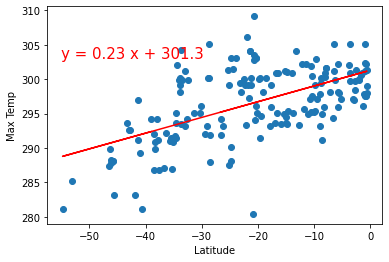

In [25]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Temp Max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,303),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Humidity (%) vs. Latitude

The r-value is: 0.010930610583317082


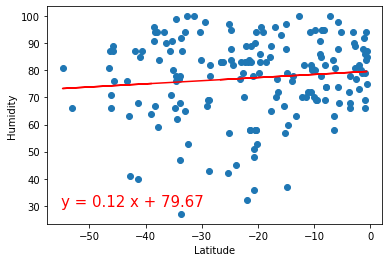

In [26]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Cloudiness (%) vs. Latitude

The r-value is: 0.10342568969174913


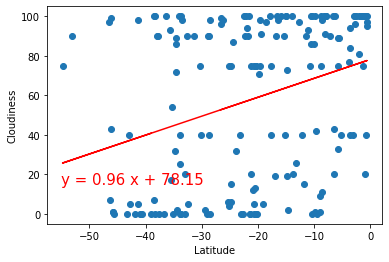

In [27]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Wind Speed (mph) vs. Latitude

The r-value is: 0.01981527332084066


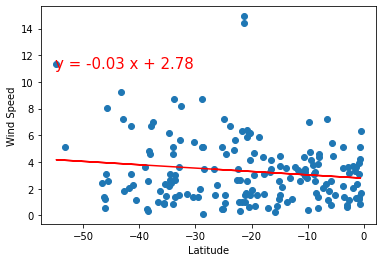

In [28]:
x_val = sh_city_df['Lat']
y_val = sh_city_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
reg_val = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, reg_val, "r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()